<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Irina Knyazeva, ODS Slack nickname: iknyazeva
    
## <center> Solar flares forecasting (ML approach)

**Research plan**
     - Dataset and features description
     - Exploratory data analysis
     - Visual analysis of the features
     - Patterns, insights, pecularities of data
     - Data preprocessing
     - Feature engineering and description
     - Cross-validation, hyperparameter tuning
     - Validation and learning curves
     - Prediction for hold-out and test samples
     - Model evaluation with metrics description
     - Conclusions

### Part 1. What is the solar flares and why we need forecast them?



The sun produces solar flares, which have the power to affect the Earth and near-Earth environment with their great bursts of electromagnetic energy and particles. These flares have the power to blow out transformers on power grids and disrupt satellite systems. There is a long lasting task of predictions such events for minimizing its negative impact. Doing so is a difficult task because of the rarity of these events. The success in this task not changes significantly over the last 60 years. Actually, this was a topic of my Ph.D. research, and I did it without any machine learning. But either in the era of big data, there is no big success in this task. The most common approach described in the paper [Bobra et al., 2014](http://link.springer.com/article/10.1007%2Fs11207-014-0529-3). The main drawback of the approach is ignoring time dependence on features. Here I tried to use knowledge about working with time series in features. All data for this project could be downloaded from the [link]  

#### Picture of the sun
Below the picture of our Sun in one of spectral lines $ H_\alpha $, the most beautifull one) 
You can see bright regions on the Sun surface, these regions called Sun active regions, and in most cases solar flares erased from such region. There is a great site (https://solarmonitor.org/) where is information about the Sun aggregated. Let's look at the Sun and there active regions 

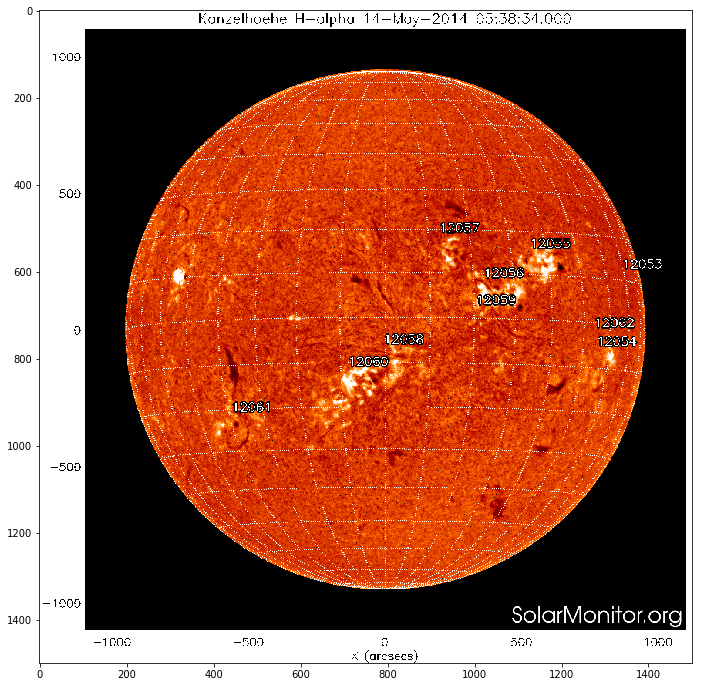

In [1]:
import matplotlib.image as mpimg
import wget
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
#посмотрим на размеченную картинку с solarmonitor
file_url = 'https://solarmonitor.org/data/2014/05/14/pngs/bbso/bbso_halph_fd_20140514_053834.png'
DOWNLOAD = True
IMG_PATH = '../../img/'
file_name = file_url.split(sep='/')[-1]

if DOWNLOAD:
    file_name = wget.download(file_url, out = os.path.join(IMG_PATH, file_name))
    img=mpimg.imread(file_name)
else:    
    img=mpimg.imread(os.path.join(IMG_PATH, file_name))
plt.figure(figsize = (12,12))
imgplot = plt.imshow(img)

#### Active regions
Active regions called active because the strength of magnetic field in this regions. Strength of magnetics fields could be taken from so-called solar magnetograms. Magnetogramm of full solar disk at the same time at the next pictures.

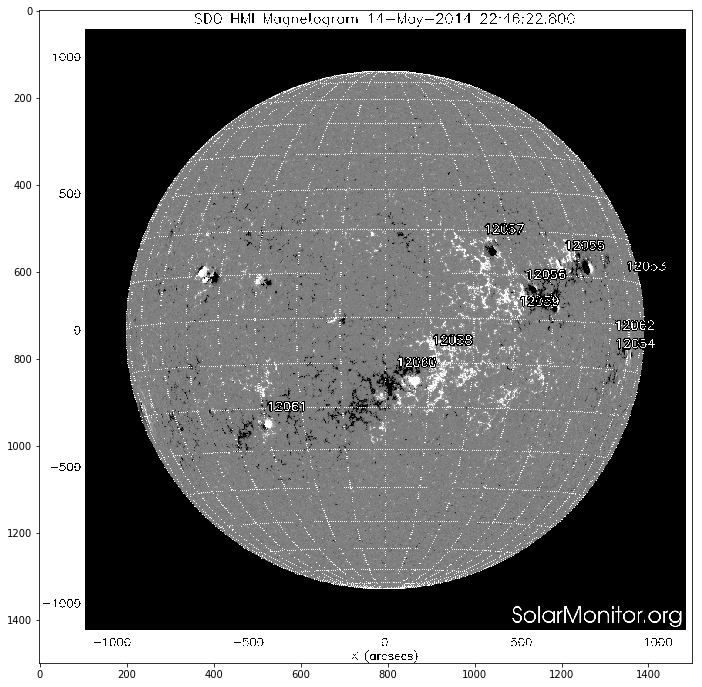

In [2]:
#посмотрим на размеченную картинку с solarmonitor
file_url = 'https://solarmonitor.org/data/2014/05/14/pngs/shmi/shmi_maglc_fd_20140514_224622.png'
DOWNLOAD = True
IMG_PATH = '../../img/'
file_name = file_url.split(sep='/')[-1]

if DOWNLOAD:
    file_name = wget.download(file_url, out = os.path.join(IMG_PATH, file_name))
    img=mpimg.imread(file_name)
else:    
    img=mpimg.imread(os.path.join(IMG_PATH, file_name))
plt.figure(figsize = (12,12))
imgplot = plt.imshow(img)

A solar flare occurs when magnetic energy that has built up in the solar atmosphere is suddenly released. Solar flares are an often occurrence when the Sun is active in the years around solar maximum. Many solar flares can occur on just one day during this period! Around solar minimum, solar flares might occur less than once per week.
#### The classification of solar flares
Solar flares are classified as A (smallest), B, C, M or X (strongest) according to the peak flux (in watts per square metre, W/m2) of 1 to 8 Ångströms X-rays near Earth, as measured by XRS instrument on-board the GOES-15 satellite which is in a geostationary orbit over the Pacific Ocean.  Some (mostly stronger) solar flares can launch huge clouds of solar plasma into space which we call a coronal mass ejection. When a coronal mass ejection arrives at Earth, it can cause a geomagnetic storm and intense auroral displays.

#### Solar flares prediction 
Most of techniques are based on the complexity of the
photospheric magnetic field of the Sun's active regions. There are a large number of dif-
ferent characteristics that can be used for magnetic field complexity description. Due to
many empirical assumptions during their calculation, they are hardly reproducible. For
HMI/SDO vector magnetograms an automated active region tracking system exist called
Spaceweather HMI Active Region Patch 
[SHARP](http://jsoc.stanford.edu/doc/data/hmi/sharp/sharp.htm). For each active region, key features
called SHARP parameters were calculated and are available online. Computation of these
features is based on [SDO vector magnetograms](https://sdo.gsfc.nasa.gov/data/aiahmi/) . 

One example of Active region at the picture below:
<img src="https://solarmonitor.org/data/2014/05/14/pngs/shmi/shmi_maglc_ar_12060_20140514_224622.png" />



## Data description

To define a solar flare, we only consider flares with a Geostationary Operational Environmental Satellite (GOES) X-ray flux peak magnitude above the M1.0 level. This allows us to focus only on major flares. For the purposes of this study, we defined a positive event to be an active region that flares with a peak magnitude above the M1.0 level, as defined by the GOES database. A negative event would be an active region that does not have such an event within a 24-hour time span. For collection active region for the negative class, we will gather also information about all regions where X-ray flux peak magnitude above the C1.0 level. So in our training set the same active region could be positive in one time and negative in the other. In each time moment, our target value will be 1 if in the next 24 hours will be the event with flux above the M1.0 level and 0 if not.

For doing that we need to describe the complexity of each active region with the features. I (and most other researchers) did it with so-called SHARP features.

The Solar Dynamic's Observatory's Helioseismic and Magnetic Imager is the first instrument to continuously map the vector magnetic field of the sun. The SDO takes the most data of any NASA satellite in history, approximately 2 terabytes per day, making it an ideal dataset for such a problem. Using this data, we can characterize active regions on the sun. From the time frame of 2010 May to 2018 December, we focused on 18 parameters calculated using the SHARP vector magnetic field data. They characterize various physical and geometrical qualities of the active region.


1. **USFLUX** is the total unsigned flux.  
2. **MEANGAM** is the mean angle of field from radial.  
3. **MEANGBT** is the mean gradient of total field.
4. **MEANGBZ** is the mean gradient of vertical field.
5. **MEANGBH** is the mean gradient of the horizontal field. 
6. **MEANJZD** is the mean vertical current density.  
7. **TOTUSJZ** is the total unsigned vertical current. 
8. **MEANALP** is the mean characteristic twist parameter.
9. **MEANJZH** is the mean current helicity.
10. **TOTUSJH** is the total unsigned vertical current.
11. **ABSNJZH** is the absolute value of the net current helicity.
12. **SAVNCPP** is the sum of the modulus of the net current per polarity. 
13. **MEANPOT** is the mean photospheric magnetic free energy.
14. **TOTPOT** is the total photospheric magnetic free energy density.
15. **MEANSHR** is the mean shear angle. 
16. **SHRGT45** is the fraction of area with shear greater than 45 degrees. 
17. **R_VALUE** is the sum of flux near polarity inversion line. 
18. **AREA_ACR** is the area of strong field pixels in the active region. 


The following section of code initializes the start and end dates of the data set used in this study and also fetches the set of possible positive events and the mapper from NOAA active region numbers to the HARPNUMs used in our database.

### Get all info about solar flares from goes
This part contain code for gathering solar data. Here data from two instruments collected: goes and SDO. There is special package sunpy for handling solar data.   

In [3]:
#pip install sunpy
#pip install suds-py3
#pip install drms
from datetime import timedelta
import datetime
import sunpy
from sunpy.time import TimeRange
from sunpy.instr import goes
import numpy as np 
import pandas as pd

In [4]:
DOWNLOAD = False
DATA_PATH = '../../data/solar_flares'
if DOWNLOAD:
    time_range = TimeRange('2010/06/01 00:10', '2018/12/01 00:20')
    #time_range = TimeRange(t_start,t_end)
    goes_events = goes.get_goes_event_list(time_range,'C1')
    goes_events = pd.DataFrame(goes_events)
else:
    goes_events = pd.read_csv(os.path.join(DATA_PATH,'goes_events_2010_2018.csv'), index_col=[0])
goes_events['noaa_active_region'] = goes_events['noaa_active_region'].replace(0,np.nan)
goes_events.dropna(inplace=True)    
goes_events.drop(['goes_location','event_date','end_time','peak_time'], axis=1, inplace=True)
goes_events.start_time = goes_events.start_time.astype('datetime64[ns]')

In [5]:
goes_events.head()

,goes_class,noaa_active_region,start_time
0,M2.0,11081.0,2010-06-12 00:30:00
1,C1.0,11080.0,2010-06-12 03:57:00
2,C6.1,11081.0,2010-06-12 09:02:00
3,M1.0,11079.0,2010-06-13 05:30:00
4,C1.2,11081.0,2010-06-13 06:08:00


### Active regions detections
There are different approaches to active regions detections. One of them with manual correction and done each day in NOAA. Active regions in this catalog have NOAA numbers. The team of SDO has own fully automated system of AR detections, and their regions called HARPs. Also, they compute plenty of parameters of magnetic field complexity. So I used harp regions with features, but information about goes flux there is only for NOAA regions. HARP and NOAA regions are not coinciding, but there is the mapping between this two catalogs. Below the code for mapping between the HARP and NOAA regions.

In [6]:
#download mapper NOAA
if os.path.isfile(os.path.join(DATA_PATH,'all_harps_with_noaa_ars.txt')):
    num_mapper = pd.read_csv(os.path.join(DATA_PATH,'all_harps_with_noaa_ars.txt'), sep=' ',index_col=[0])
else:
    num_mapper = pd.read_csv('http://jsoc.stanford.edu/doc/data/hmi/harpnum_to_noaa/all_harps_with_noaa_ars.txt',sep=' ')
    num_mapper.to_csv(os.path.join(DATA_PATH,'all_harps_with_noaa_ars.txt'), sep=' ')

In [7]:
num_mapper.tail()

,HARPNUM,NOAA_ARS
1314,7304,12721
1315,7305,12722
1316,7310,12723
1317,7312,12724
1318,7313,12725


In [8]:
def convert_noaa_to_harpnum(noaa_ar):
    """
    Converts from a NOAA Active Region to a HARPNUM
    Returns harpnum if present, else None if there are no matching harpnums
    
    Args:
    """
    idx = num_mapper[num_mapper['NOAA_ARS'].str.contains(str(int(noaa_ar)))]
    return None if idx.empty else int(idx.HARPNUM.values[0])
goes_events['harp_number'] = goes_events['noaa_active_region'].apply(convert_noaa_to_harpnum)
goes_events.dropna(inplace=True)

Events class could be mapped to flux, which is continuous.  It could be done with method flareclass_to_flux from goes 

In [9]:
#Goes class flares better convert to flux value. It could be done with method flareclass_to_flux from goes
goes_events['flux'] =  goes_events['goes_class'].apply(lambda x: 1e06*goes.flareclass_to_flux(x).value)
goes_events.head()

,goes_class,noaa_active_region,start_time,harp_number,flux
0,M2.0,11081.0,2010-06-12 00:30:00,54.0,20.0
1,C1.0,11080.0,2010-06-12 03:57:00,51.0,1.0
2,C6.1,11081.0,2010-06-12 09:02:00,54.0,6.1
3,M1.0,11079.0,2010-06-13 05:30:00,49.0,10.0
4,C1.2,11081.0,2010-06-13 06:08:00,54.0,1.2


In one region could be many flares of differents classes. We have more then 1300 events and only  Let's see to the countplot for the harp_number

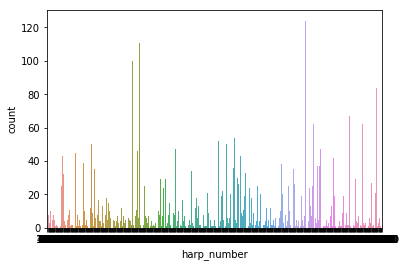

In [15]:
import seaborn as sns
sns.countplot(x='harp_number', data = goes_events)

### Loading data

Data  with the main features of Active regions could be taken from SDO database. There is a special package for acesssing data drms. We will download meta information with the all keywords with drms

In [16]:
#here list of keywords we want to download. Keywords computed for harp regions. 
#Here we walk through the all harp regions, download features and save them to disk (it is very time consuming)
import drms
c = drms.Client()
list_keywords = ['T_REC,CRVAL1,CRLN_OBS,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH']
harp_list = pd.unique(goes_events.harp_number)
for harp in harp_list:
    str_query = f'hmi.sharp_cea_720s[{str(int(harp))}]'

    if os.path.isfile(os.path.join(DATA_PATH+'/keys_regions',str_query+'.csv')):
        print(f'Harp number {harp} already exist\n')
    else:
        print(f'load region with Harp number {harp}')
        keys = c.query(str_query, key=list_keywords)
        keys.to_csv(os.path.join(DATA_PATH+'/keys_regions',str_query+'.csv'))
    
    

Harp number 54.0 already exist

Harp number 51.0 already exist

Harp number 49.0 already exist

Harp number 86.0 already exist

Harp number 92.0 already exist

Harp number 104.0 already exist

Harp number 115.0 already exist

Harp number 156.0 already exist

Harp number 185.0 already exist

Harp number 187.0 already exist

Harp number 190.0 already exist

Harp number 211.0 already exist

Harp number 226.0 already exist

Harp number 224.0 already exist

Harp number 245.0 already exist

Harp number 252.0 already exist

Harp number 274.0 already exist

Harp number 284.0 already exist

Harp number 297.0 already exist

Harp number 318.0 already exist

Harp number 327.0 already exist

Harp number 325.0 already exist

Harp number 345.0 already exist

Harp number 362.0 already exist

Harp number 371.0 already exist

Harp number 384.0 already exist

Harp number 377.0 already exist

Harp number 392.0 already exist

Harp number 393.0 already exist

Harp number 394.0 already exist

Harp number 407

### Part 2. Exploratory data analysis
Now there are many CSV files for each harp region and we can analyze the evolution of different parameters with the time. It is believed that before the flares complexity of magnetic field changes and there are special patterns in features evolutions.  

In [17]:
def plot_harp_features_flares(harp, goes_events = goes_events, DATA_PATH=DATA_PATH, feature_key = 'R_VALUE'):
    str_query = f'hmi.sharp_cea_720s[{str(int(harp))}]'
    df = pd.read_csv(os.path.join(DATA_PATH+'/keys_regions',str_query+'.csv'), index_col=[0])
    df['T_REC']  = drms.to_datetime(df.T_REC)
    df.set_index('T_REC', inplace=True)
    first_date = df.index.get_values()[0]

    is_visible =  abs(df['CRVAL1']-df['CRLN_OBS'])<60
    df = df[is_visible]

    flux = goes_events[goes_events['harp_number']==harp][['start_time','flux']].set_index('start_time')
    #plt.figure(figsize = (10,14))
    fig, ax1 = plt.subplots(figsize=(15,5))
    #ax1.figure(figsize = (10,14))
    first_date = flux.index.get_values()[0]
    first_date = df.index.get_values()[0]
    #t2 = flux.index.get_values()[0]
    #first_data = min(t1,t2)
    dates_to_show = pd.date_range(pd.Timestamp(first_date).strftime('%m/%d/%Y'), periods=14, freq='d')
    labels = dates_to_show.strftime('%b %d')
    color = 'tab:green'
    ax1.plot(df.index, df[feature_key], color=color)
    ax2 = ax1.twinx()
    ax2.bar(flux.index, flux.flux, width=0.05, facecolor='indianred')
    plt.setp(ax1, xticks=dates_to_show, xticklabels=labels);
    #ax2.set_ylim(0,10)

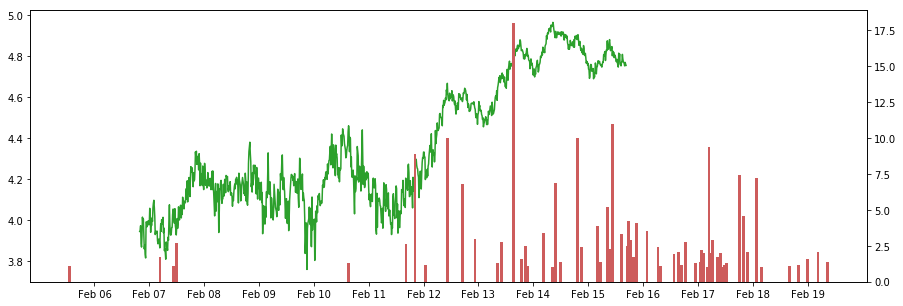

In [18]:
harp = 6327
plot_harp_features_flares(harp, feature_key = 'R_VALUE')

## Features from csv

Now we need to generate features from time series evolutions. It is believed that active region "prepared for giving a flare". So I decided to take complexity features at the considered moment add aggregates  from the past
    1. Features at the time moment, not all moments each 2 hours
    2. Mean and range (max-min) for features at the last 2 hours
    3. Mean and range (max-min) at the last 6 hours
    4. Mean and range (max-min) at the last 12 hours
    5. Mean and range (max-min) at the last 24 hours
    6. Mean and range (max-min) at the last 48 hours
    
Also there are instrumental distortion if angle between observer and the point at the sun big, usually records where latituted more than 70 is droped from estimation.  

In [19]:
def extract_features_from_csv(harp, time_stamp = 2, delay_hours = [2,6,12,24,48], long=70):
    """
    process downloaded csv files with time series features and create features from them
    harp: harp number 
    time_stamp: frequence 
    delay_hour:
    return: data_frame with features
    """
    
    str_query = f'hmi.sharp_cea_720s[{str(int(harp))}]'
    df = pd.read_csv(os.path.join(DATA_PATH+'/keys_regions',str_query+'.csv'), index_col=[0])
    df['T_REC']  = drms.to_datetime(df.T_REC)
    df.set_index('T_REC', inplace=True)
    is_visible =  abs(df['CRVAL1']-df['CRLN_OBS'])<long
    df = df[is_visible].drop(['CRVAL1','CRLN_OBS'], axis=1)
    first_date = df.index.get_values()[0]
    last_date = df.index.get_values()[-1]
    first_date = first_date+np.timedelta64(1, 'D')
    #round to closet whole hour
    first_date = pd.to_datetime(first_date).replace(microsecond=0,second=0,minute=0)+timedelta(hours=1)
    
    t_range = pd.date_range(first_date, last_date, freq=str(time_stamp)+'H')
    df_orig = df.loc[t_range]
    df_list = []
    df_list.append(df_orig)
    for delay in delay_hours:
        columns_=[col+'_mean_'+str(delay) for col in df_orig.columns]
        df_delay = df.rolling(str(delay)+'h').mean()
        df_delay.columns = columns_
        df_delay = df_delay.loc[t_range]
        df_list.append(df_delay)  
        columns_=[col+'_range_'+str(delay) for col in df_orig.columns]
        df_delay = df.rolling(str(delay)+'h').max() - df.rolling(str(delay)+'h').min()
        df_delay.columns = columns_
        df_delay = df_delay.loc[t_range]
        df_list.append(df_delay)
    full_df = pd.concat(df_list, axis=1) 
    full_df.dropna(inplace=True)
    full_df['HARP']=harp
    return full_df

In [21]:
harp = harp_list[4]
full_df = extract_features_from_csv(harp)
full_df.head()

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,MEANGBZ_range_48,MEANJZD_range_48,TOTUSJZ_range_48,SAVNCPP_range_48,TOTPOT_range_48,MEANSHR_range_48,AREA_ACR_range_48,R_VALUE_range_48,ABSNJZH_range_48,HARP
2010-07-20 16:00:00,2.873286e+22,86.112,0.001684,5058.177,14.663,1648.232,42.537,0.004074,33.587,95.752,...,27.653,0.223992,1.587933e+13,1.480204e+13,1.098858e+23,2.682,428.872528,0.731,135.034,92.0
2010-07-20 18:00:00,2.987362e+22,81.151,0.001855,5019.616,14.127,1633.121,40.285,0.004760,34.306,89.823,...,27.653,0.223992,1.676384e+13,1.480204e+13,1.298242e+23,2.682,436.958527,0.731,135.034,92.0
2010-07-20 20:00:00,3.020606e+22,82.845,0.002830,5241.574,14.681,1638.215,40.118,0.006997,34.580,89.737,...,27.653,0.223992,1.676384e+13,1.480204e+13,1.413567e+23,2.682,450.372223,0.731,135.034,92.0
2010-07-20 22:00:00,3.090511e+22,86.301,0.003532,5653.532,14.854,1718.171,41.766,0.008016,34.414,92.952,...,27.653,0.223992,1.676384e+13,1.480204e+13,1.616750e+23,2.682,472.899811,0.731,172.727,92.0
2010-07-21 00:00:00,3.245146e+22,85.072,0.003725,5859.100,16.947,1826.724,42.138,0.008864,35.810,92.350,...,27.653,0.223992,1.901301e+13,1.480204e+13,1.975883e+23,2.682,506.663239,0.749,172.727,92.0


### Define target
At each active region (harp) at each moment targer will be the number of events  where flux exceed M1.0 level (or 10 in flux value) in any time in the next 24 hours and 0 when there is not such events. Actually I will predict only the fact of solar flares, but maybe in future this information will be usefull, especially on error analysis stage

In [22]:
def compute_target(full_df, goes_events=goes_events, horizont = 24, level = 10):
    harp = full_df['HARP'][0]
    big_events = goes_events[(goes_events['harp_number']==harp) &(goes_events.flux>level)]
    target = pd.Series(full_df.index.map(lambda x: np.sum((x>big_events.start_time - np.timedelta64(horizont,'h'))
           & (x<big_events.start_time))))
    full_df['target'] = target.values
    return full_df 
full_df=compute_target(full_df)

### Feature from goes history
Also it is seemed usefull to account previous activity in the active region. Here I sum all previous activity up to the considered moment


In [23]:
def compute_prev_flux(full_df, goes_events=goes_events):
    harp = full_df['HARP'][0]

    goes_harp = goes_events[(goes_events['harp_number']==harp)]
    prev_flux  = pd.Series(full_df.index.map(lambda x: goes_harp.loc[goes_harp.start_time<x].flux.sum()))
    full_df['prev_flux'] = prev_flux.values
    return full_df
full_df=compute_prev_flux(full_df)

In [24]:
full_df.head()

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,...,TOTUSJZ_range_48,SAVNCPP_range_48,TOTPOT_range_48,MEANSHR_range_48,AREA_ACR_range_48,R_VALUE_range_48,ABSNJZH_range_48,HARP,target,prev_flux
2010-07-20 16:00:00,2.873286e+22,86.112,0.001684,5058.177,14.663,1648.232,42.537,0.004074,33.587,95.752,...,1.587933e+13,1.480204e+13,1.098858e+23,2.682,428.872528,0.731,135.034,92.0,0,1.4
2010-07-20 18:00:00,2.987362e+22,81.151,0.001855,5019.616,14.127,1633.121,40.285,0.004760,34.306,89.823,...,1.676384e+13,1.480204e+13,1.298242e+23,2.682,436.958527,0.731,135.034,92.0,0,1.4
2010-07-20 20:00:00,3.020606e+22,82.845,0.002830,5241.574,14.681,1638.215,40.118,0.006997,34.580,89.737,...,1.676384e+13,1.480204e+13,1.413567e+23,2.682,450.372223,0.731,135.034,92.0,0,1.4
2010-07-20 22:00:00,3.090511e+22,86.301,0.003532,5653.532,14.854,1718.171,41.766,0.008016,34.414,92.952,...,1.676384e+13,1.480204e+13,1.616750e+23,2.682,472.899811,0.731,172.727,92.0,0,1.4
2010-07-21 00:00:00,3.245146e+22,85.072,0.003725,5859.100,16.947,1826.724,42.138,0.008864,35.810,92.350,...,1.901301e+13,1.480204e+13,1.975883e+23,2.682,506.663239,0.749,172.727,92.0,0,1.4


In [27]:
from tqdm import tqdm

In [28]:
DOWNLOAD = False
if DOWNLOAD and os.path.isfile(os.path.join(DATA_PATH, 'solar_train.pkl')):
    train_df  = pd.read_pickle(os.path.join(DATA_PATH, 'solar_train.pkl'))
else:
    df_list=[]
    for harp in tqdm(harp_list):
        df_ = extract_features_from_csv(harp)
        if df_.shape[0]==0:
            continue
        df_ = compute_target(df_, goes_events=goes_events)
        df_ = compute_prev_flux(df_)
        df_['Time'] = df_.index
        df_list.append(df_)
    train_df = pd.concat(df_list, ignore_index=True).sort_values(by = 'Time') 
    train_df.to_pickle(os.path.join(DATA_PATH, 'solar_train.pkl'))

100%|██████████| 625/625 [03:13<00:00,  3.23it/s]


### Part 3. Visual analysis of the features. Patterns, insights, pecularities of data 

#### Target distribution

Strong solar flares is rare events. Let's see to the target distribution. We have 4 values of target, but really 

In [29]:
train_df.target.value_counts()

0     57562
1      2030
2       547
3       221
4        86
5        71
6        30
7        13
8         8
9         7
10        2
11        1
Name: target, dtype: int64

In [31]:
train_df['bin_target'] = train_df.target.map(lambda x: 0 if x==0 else 1)
train_df['bin_target'].value_counts()

0    57562
1     3016
Name: bin_target, dtype: int64

Let's see how the main features (without aggregates) depends with each other and with the target

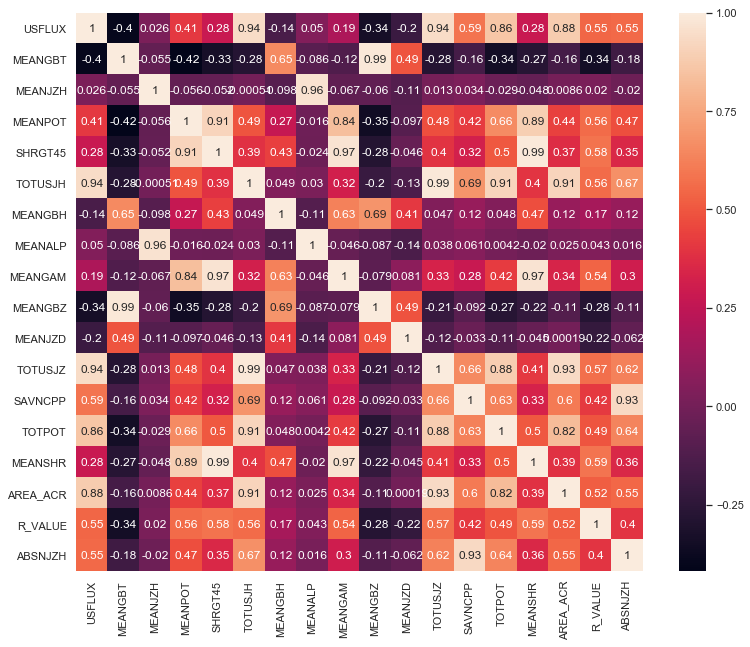

In [32]:
key_cols = str.split('USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH', sep=',')
sns.set(rc={'figure.figsize':(12.7,10.27)})
sns.heatmap(train_df[key_cols].corr(), annot=True)


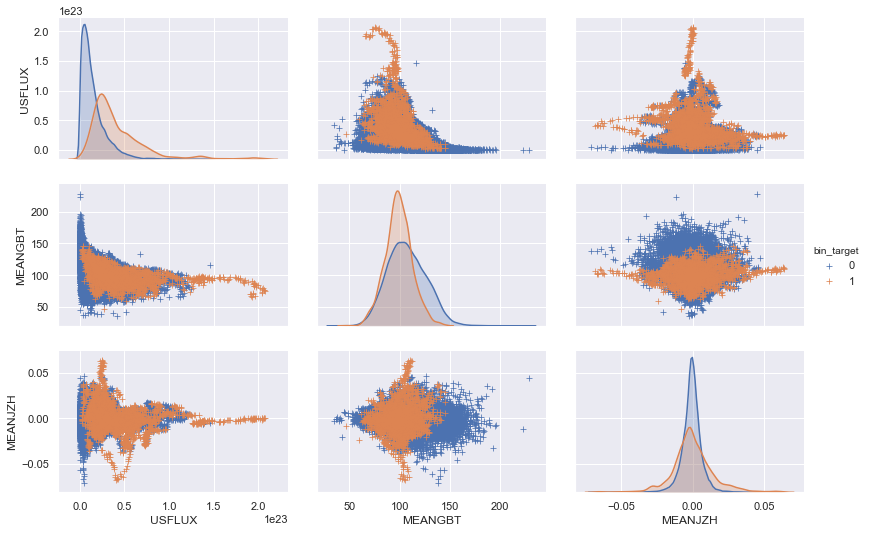

In [33]:
sns.pairplot( train_df, vars=key_cols[:3], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

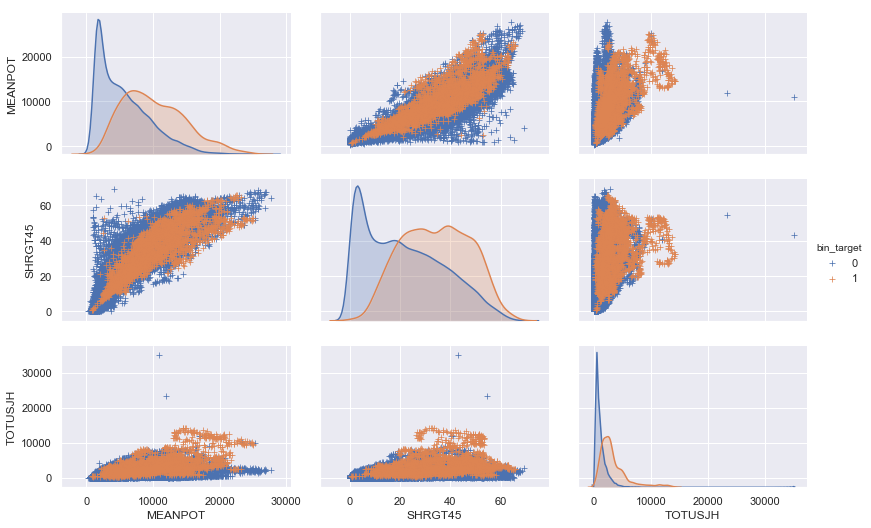

In [34]:
sns.pairplot( train_df, vars=key_cols[3:6], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

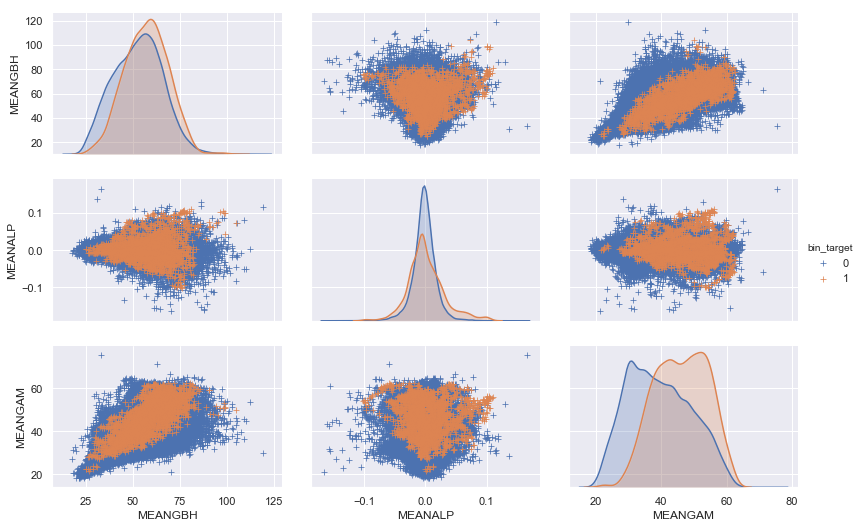

In [35]:
sns.pairplot( train_df, vars=key_cols[6:9], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

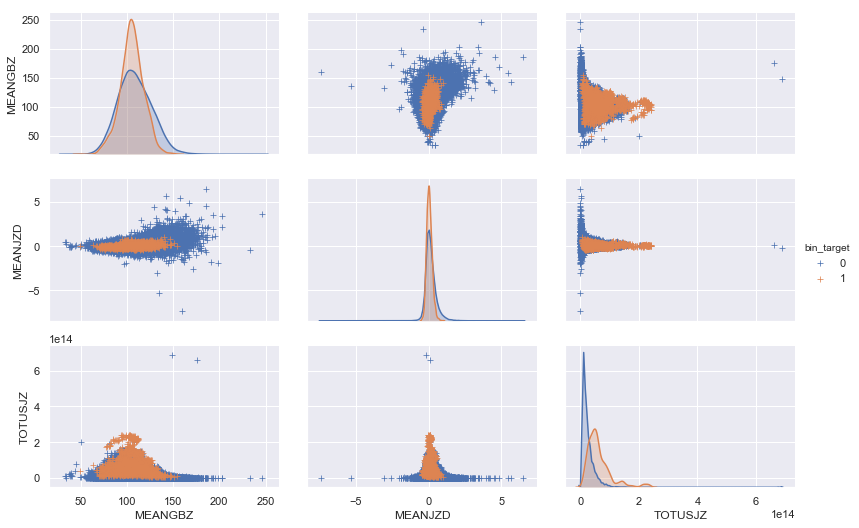

In [36]:
sns.pairplot( train_df, vars=key_cols[9:12], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

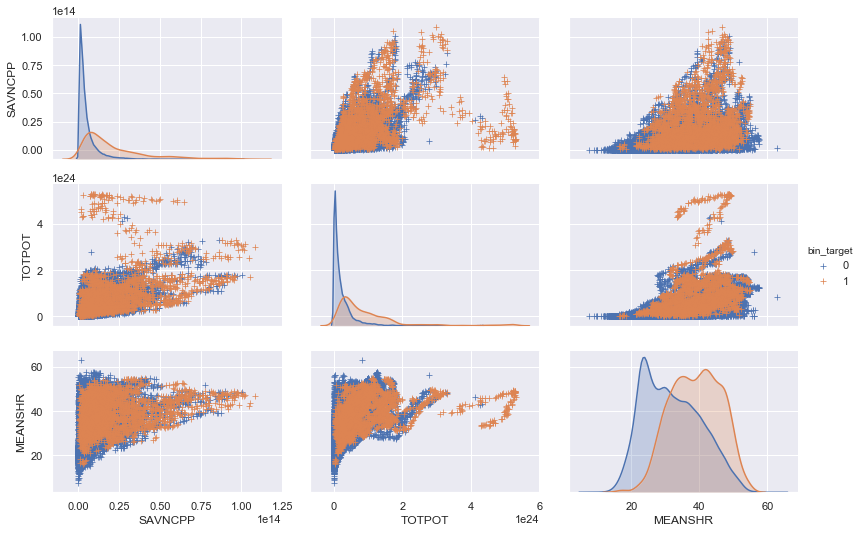

In [37]:
sns.pairplot( train_df, vars=key_cols[12:15], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

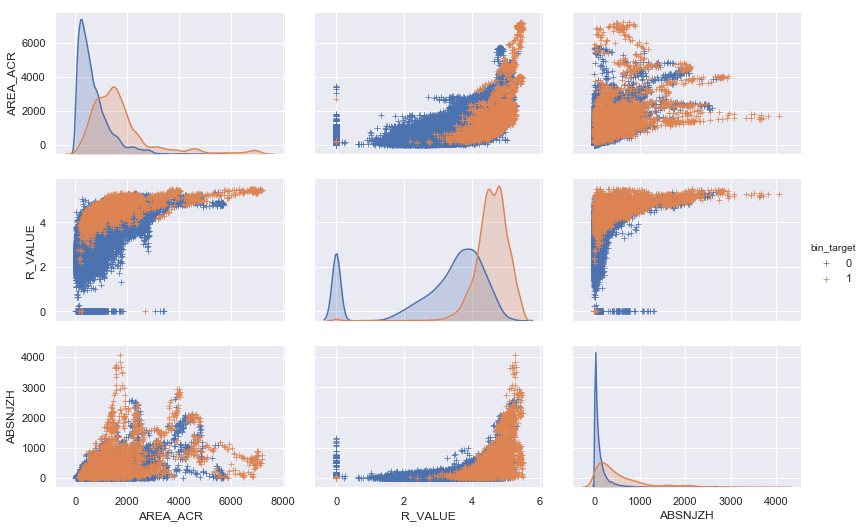

In [38]:
sns.pairplot( train_df, vars=key_cols[15:18], 
             diag_kind='kde',hue='bin_target', markers="+", aspect=1.5);

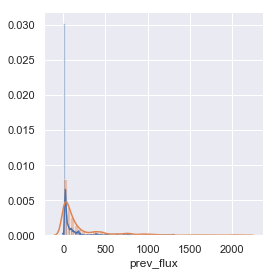

In [39]:
g = sns.FacetGrid(train_df, hue="bin_target", height=4)
g.map(sns.distplot, 'prev_flux')

### Part 5. Data preprocessing. Metric selection and model selection
This is a binary classification problem with highly unbalances data. In practice, if we want to safe space objects from damages it is more important to reveal all cases, so we will watch to recall as a metric, but in cross-validation roc_auc as a more balanced metric will be used. 

For holdout set I  leave all 2017 and 2018 year. But actually, we could update the model in real time and such splitting not so important.

For cross_validation I will use time series split, in other cases I'll get data leakage, through 24 hours I will definitely now about flare  
As a model, I start with logistic regression as a baseline, try random forest and lighgbm. 


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV
from sklearn.metrics import roc_auc_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [40]:
#create Year feature
train_df['Year'] = train_df.Time.dt.year

In [41]:
train_part = train_df.loc[~train_df['Year'].isin([2017,2018])]
test_part = train_df.loc[train_df['Year'].isin([2017,2018])]

In [42]:
train_part.bin_target.value_counts()

0    55357
1     2907
Name: bin_target, dtype: int64

In [43]:
test_part.bin_target.value_counts()

0    2205
1     109
Name: bin_target, dtype: int64

So we have 2907 positive events in train set and 109 in test. Try to fit baseline model only with key features without aggregates

In [46]:
tcv = TimeSeriesSplit(n_splits=10)
logit_pipe = Pipeline([('scaler', StandardScaler()), ('logit', LogisticRegression(class_weight='balanced', random_state=17))])
score = cross_val_score(logit_pipe, train_part[key_cols], train_part['bin_target'], cv=tcv, scoring = 'roc_auc')
print('Validation score:', score)
logit_pipe.fit(train_part[key_cols], train_part['bin_target'])


Validation score: [0.83936571 0.87707217 0.90893532 0.88793145 0.9074623  0.85113912
 0.88153553 0.92229426 0.94541108 0.97165196]


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=17,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

Actually not so bad, let's see at the confusion matrix at the train and test part.

In [52]:
y_pred = logit_pipe.predict_proba(train_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(train_part['bin_target'],y_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,46546,8811
Flare,432,2475


In [51]:
y_pred = logit_pipe.predict_proba(test_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(test_part['bin_target'],y_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,1893,312
Flare,11,98


So we missed 11 flares at the test set, and 432 in train set.
Let's try Random Forest from the box

In [53]:
%%time
rf = RandomForestClassifier(n_estimators = 100, max_depth=3, class_weight='balanced')
score = cross_val_score(rf, train_part[key_cols], train_part['bin_target'], cv=tcv, scoring = 'roc_auc')
print('Validation score:', score)

Validation score: [0.86230057 0.85852264 0.92109163 0.87203535 0.92915847 0.81775319
 0.90054192 0.94825173 0.93097306 0.94975423]
CPU times: user 27.7 s, sys: 99.2 ms, total: 27.8 s
Wall time: 27.9 s


In [54]:
%%time
rf = RandomForestClassifier(n_estimators = 500,  max_depth=3, class_weight='balanced')
rf.fit(train_part[key_cols], train_part['bin_target'])

CPU times: user 26.9 s, sys: 51.8 ms, total: 27 s
Wall time: 27 s


In [55]:
rf_pred = rf.predict_proba(train_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(train_part['bin_target'],rf_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,44651,10706
Flare,341,2566


In [56]:
rf_pred = rf.predict_proba(test_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(test_part['bin_target'],rf_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,1788,417
Flare,10,99


In [58]:
import lightgbm as lgb

In [59]:
%%time
lg = lgb.LGBMClassifier(n_estimators=300, max_depth=5, num_leaves=10)
tcv = TimeSeriesSplit(n_splits=10)
score = cross_val_score(lg, train_part[key_cols], train_part['bin_target'], cv=tcv, scoring = 'roc_auc')
print('Validation score:', score)

Validation score: [0.81269878 0.83454889 0.89848205 0.8365124  0.90823603 0.83935618
 0.89662493 0.89901371 0.9400985  0.94006962]
CPU times: user 26.9 s, sys: 875 ms, total: 27.8 s
Wall time: 3.68 s


In [60]:
lg = lgb.LGBMClassifier(n_estimators=500, max_depth=5, num_leaves=10)
lg.fit(train_part[key_cols], train_part['bin_target'])
lg_pred = lg.predict_proba(train_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(train_part['bin_target'],lg_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,55272,85
Flare,985,1922


In [61]:
lg_pred = lg.predict_proba(test_part[key_cols])
class_names = ['No Flare', 'Flare']
pd.DataFrame(confusion_matrix(test_part['bin_target'],lg_pred[:,1]>0.5), index=class_names, columns=class_names)

,No Flare,Flare
No Flare,2189,16
Flare,57,52


Lightgbm with this parameters give us less false positive alarms, but very low recall

### Part 6. Feature engineering and description 

Actually all features enineering was done before, it is  historical features, previous flux, here we try to use them and add Year as a feature, because there is a 11 year cycle in solar activity. Number of flares changes significantly from year to year.

In [81]:
#number of flares by years
train_df.groupby('Year')['bin_target'].count()

Year
2010     1705
2011     9951
2012    10332
2013    11479
2014    10764
2015     9692
2016     4341
2017     1900
2018      414
Name: bin_target, dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [84]:
#ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
cat_cols = ['Year']

In [77]:
idx_split = train_part.shape[0]

In [86]:
%%time
tcv = TimeSeriesSplit(n_splits=10)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=1, class_weight='balanced', random_state=17))])
score = cross_val_score(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=tcv, scoring = 'roc_auc')
print('Validation score:', score)


Validation score: [0.81231189 0.87121982 0.90387168 0.89593347 0.90781307 0.84514172
 0.87804601 0.92222877 0.94466646 0.97234176]
CPU times: user 4.15 s, sys: 768 ms, total: 4.91 s
Wall time: 2.08 s


Lets try to add delay features for 24 hours, range for example

In [92]:
%%time
tcv = TimeSeriesSplit(n_splits=10)
delay=24
col_range=[col+'_range_'+str(delay) for col in key_cols]
num_cols = key_cols+['prev_flux']+col_range
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=1, class_weight='balanced', random_state=17))])
score = cross_val_score(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=tcv, scoring = 'roc_auc')
print('Validation score:', score)


Validation score: [0.73844118 0.83062265 0.88101863 0.91204771 0.90414934 0.84502861
 0.91052371 0.92083644 0.93478853 0.96807505]
CPU times: user 6.85 s, sys: 913 ms, total: 7.76 s
Wall time: 4.88 s


Don't see any improvement, so I try will tune logistic with base features and lightgbm on the whole dataset. Random Forest will be later

### Part 7. Cross-validation, hyperparameter tuning

In [95]:
%%time
tcv = TimeSeriesSplit(n_splits=5)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=1, class_weight='balanced', random_state=17))])

param_grid = {
    'logit__C': [.5, 1.0, 2.0, 10.0]
    }
gs = GridSearchCV(logit_pipe, param_grid, cv=tcv, scoring = 'roc_auc', n_jobs = -1)
gs.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'])

CPU times: user 683 ms, sys: 106 ms, total: 789 ms
Wall time: 2.8 s


In [96]:
pd.DataFrame(gs.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score']]

,params,mean_test_score,std_test_score,mean_train_score
0,{'logit__C': 0.5},0.900725,0.033296,0.919624
1,{'logit__C': 1.0},0.900000,0.033815,0.919698
2,{'logit__C': 2.0},0.899578,0.034128,0.919722
3,{'logit__C': 10.0},0.899208,0.034409,0.919733


In [100]:
%%time
tcv = TimeSeriesSplit(n_splits=5)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=1, class_weight='balanced', random_state=17))])

param_grid = {
    'logit__C': [0.01, 0.025,0.05,.1,0.15,0.2,0.3,0.4]
    }
gs = GridSearchCV(logit_pipe, param_grid, cv=tcv, scoring = 'roc_auc', n_jobs = -1)
gs.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'])

CPU times: user 716 ms, sys: 173 ms, total: 889 ms
Wall time: 4.01 s


In [101]:
pd.DataFrame(gs.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score']]

,params,mean_test_score,std_test_score,mean_train_score
0,{'logit__C': 0.01},0.912002,0.028881,0.915883
1,{'logit__C': 0.025},0.909035,0.028995,0.917852
2,{'logit__C': 0.05},0.906566,0.029814,0.918653
3,{'logit__C': 0.1},0.904165,0.031044,0.919141
4,{'logit__C': 0.15},0.903023,0.031741,0.919322
5,{'logit__C': 0.2},0.902318,0.032197,0.919421
6,{'logit__C': 0.3},0.901505,0.032753,0.919534
7,{'logit__C': 0.4},0.901041,0.033077,0.919594


In [102]:
%%time
tcv = TimeSeriesSplit(n_splits=10)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=0.01, class_weight='balanced', random_state=17))])
score = cross_val_score(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=tcv, scoring = 'roc_auc', n_jobs=-1)
print('Validation score:', score)

Validation score: [0.8295893  0.87894132 0.92319003 0.89828315 0.91741287 0.84360952
 0.91225242 0.92652429 0.94470837 0.97363456]
CPU times: user 91.4 ms, sys: 32.2 ms, total: 124 ms
Wall time: 891 ms
CPU times: user 93.4 ms, sys: 32.2 ms, total: 126 ms
Wall time: 893 ms


### Tuning lightgbm (ohe features)


In [103]:
import lightgbm as lgb

In [104]:
tcv = TimeSeriesSplit(n_splits=10)
delay=24
col_range=[col+'_range_'+str(delay) for col in key_cols]
col_mean = [col+'_mean_'+str(delay) for col in key_cols]
num_cols = key_cols+['prev_flux']+col_range+col_mean
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
#score = cross_val_score(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=tcv, scoring = 'roc_auc')
#print('Validation score:', score)

In [105]:
%%time
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [5,10,15,20],
              "num_leaves": [5,10,20,30],
              "n_estimators": [300],
              #"learning_rate" : [0.1,0.05]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = tcv, scoring="roc_auc", verbose=5)
grid_search.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target']) 

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   40.5s
/Users/Irisha1/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/Irisha1/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/Irisha1/.pyenv/versions/3.6.6/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped 

CPU times: user 10.5 s, sys: 1.07 s, total: 11.6 s
Wall time: 2min 21s


In [106]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score']]

,params,mean_test_score,std_test_score,mean_train_score
0,"{'max_depth': 5, 'n_estimators': 300, 'num_lea...",0.888778,0.040571,0.995319
1,"{'max_depth': 5, 'n_estimators': 300, 'num_lea...",0.894613,0.036002,0.999633
2,"{'max_depth': 5, 'n_estimators': 300, 'num_lea...",0.885179,0.038867,0.999993
3,"{'max_depth': 5, 'n_estimators': 300, 'num_lea...",0.886668,0.039427,0.999998
4,"{'max_depth': 10, 'n_estimators': 300, 'num_le...",0.888778,0.040571,0.995319
5,"{'max_depth': 10, 'n_estimators': 300, 'num_le...",0.889141,0.037387,0.999730
6,"{'max_depth': 10, 'n_estimators': 300, 'num_le...",0.886775,0.042001,0.999999
7,"{'max_depth': 10, 'n_estimators': 300, 'num_le...",0.889464,0.039373,1.000000
8,"{'max_depth': 15, 'n_estimators': 300, 'num_le...",0.888778,0.040571,0.995319
9,"{'max_depth': 15, 'n_estimators': 300, 'num_le...",0.889141,0.037387,0.999730


In [107]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score']].iloc[1,0]

{'max_depth': 5, 'n_estimators': 300, 'num_leaves': 10}

In [108]:
lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [5],
              "num_leaves": [10],
              "n_estimators": [500],
              "learning_rate" : [0.025,0.015, 0.01]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target']) 

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   10.5s remaining:   36.8s
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   10.6s remaining:   13.3s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   10.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   16.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [5], 'num_leaves': [10], 'n_estimators': [500], 'learning_rate': [0.025, 0.015, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=5)

In [109]:
pd.DataFrame(grid_search.cv_results_)[['params','mean_test_score', 'std_test_score', 'mean_train_score']]

,params,mean_test_score,std_test_score,mean_train_score
0,"{'learning_rate': 0.025, 'max_depth': 5, 'n_es...",0.907031,0.019782,0.994307
1,"{'learning_rate': 0.015, 'max_depth': 5, 'n_es...",0.909134,0.021125,0.986157
2,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.910267,0.020553,0.977358


So for lightgbm final set of parameters  param_dist = {"max_depth": [5],
              "num_leaves": [10],
              "n_estimators": [500],
              "learning_rate" : [0.01]
             }

### Part 8. Validation and learning curves

Let's plot learning curve for both models with best parameters

In [110]:
from sklearn.model_selection import learning_curve

In [111]:
tcv = TimeSeriesSplit(n_splits=5)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=0.01, class_weight='balanced', random_state=17))])

In [112]:
train_sizes, train_scores, test_scores = learning_curve(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=tcv, scoring='roc_auc', n_jobs=-1)

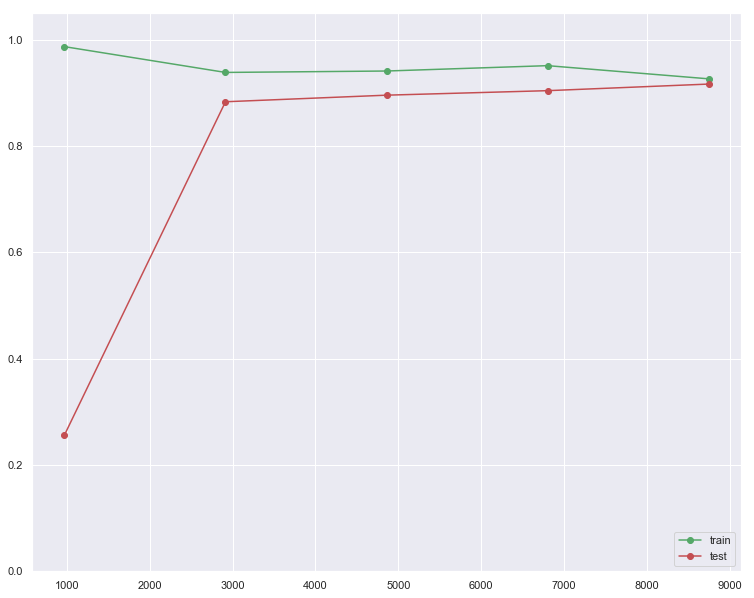

In [113]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

In [114]:
delay=24
col_range=[col+'_range_'+str(delay) for col in key_cols]
col_mean = [col+'_mean_'+str(delay) for col in key_cols]
num_cols = key_cols+['prev_flux']+col_range+col_mean
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
lg = lgb.LGBMClassifier(silent=False,max_depth=5, num_leaves=10,n_estimators=500,learning_rate=0.01)
train_sizes, train_scores, test_scores = learning_curve(lg, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=tcv, scoring='roc_auc', n_jobs=-1)

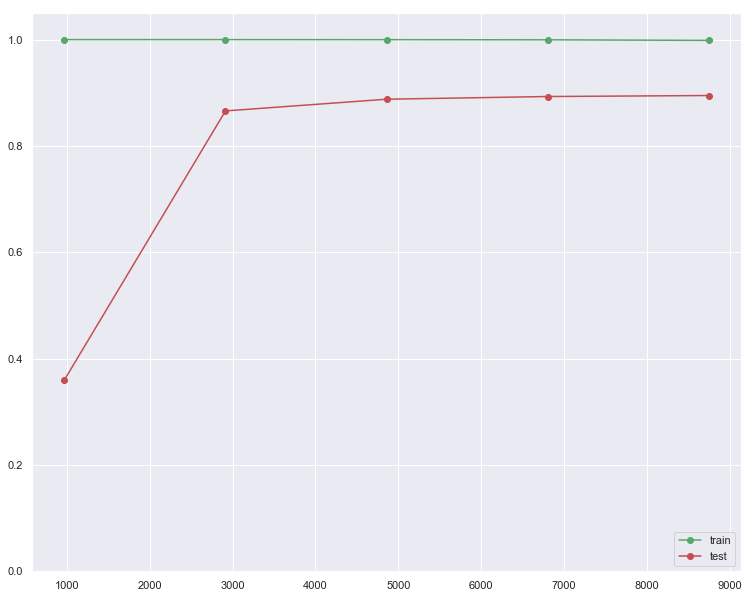

In [115]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
plt.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
plt.ylim((0.0, 1.05))
plt.legend(loc='lower right')

Learning curves looks OK!

### Part 9. Prediction for hold-out and test samples  and model evaluation

Now time to fit model on the whole dataset and test it on the hold out

In [116]:
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=0.01, class_weight='balanced', random_state=17))])
logit_pipe.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'])


Pipeline(memory=None,
     steps=[('transform', ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', StandardScaler(copy=True, with_mean=True, with_std=True), ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH', 'MEANGBH', ..., penalty='l2', random_state=17,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [121]:
logit_pred = logit_pipe.predict_proba(train_ohe.loc[idx_split:,:])
class_names = ['No Flare', 'Flare']
print(roc_auc_score(train_df.loc[idx_split:,'bin_target'],logit_pred[:,1]))
pd.DataFrame(confusion_matrix(train_df.loc[idx_split:,'bin_target'],logit_pred[:,1]>0.5), index=class_names, columns=class_names)


0.9513158168466163


,No Flare,Flare
No Flare,1843,362
Flare,9,100


In [123]:
delay=24
col_range=[col+'_range_'+str(delay) for col in key_cols]
col_mean = [col+'_mean_'+str(delay) for col in key_cols]
num_cols = key_cols+['prev_flux']+col_range+col_mean
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
lg = lgb.LGBMClassifier(silent=False,max_depth=5, num_leaves=10,n_estimators=800,learning_rate=0.01)
lg.fit(train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'])

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.01, max_depth=5,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=800, n_jobs=-1, num_leaves=10, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [131]:
#lg_pred = lg.predict_proba(train_ohe.loc[idx_split:,:])
class_names = ['No Flare', 'Flare']
lg_pred = lg.predict_proba(train_ohe.loc[idx_split:,:])
pd.DataFrame(confusion_matrix(train_df.loc[idx_split:,'bin_target'],lg_pred[:,1]>0.5), index=class_names, columns=class_names)


,No Flare,Flare
No Flare,2205,0
Flare,60,49


Here we can see no false alarm, let's mix them

In [132]:
from sklearn.model_selection import cross_val_predict

In [135]:
tcv = TimeSeriesSplit(n_splits=5)
num_cols = key_cols+['prev_flux']
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
logit_pipe = Pipeline([('transform', ct), ('logit', LogisticRegression(C=0.01, class_weight='balanced', random_state=17))])
y_pred_logit = cross_val_predict(logit_pipe, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=3, method='predict_proba')[:,1]


In [136]:
delay=24
col_range=[col+'_range_'+str(delay) for col in key_cols]
col_mean = [col+'_mean_'+str(delay) for col in key_cols]
num_cols = key_cols+['prev_flux']+col_range+col_mean
transformers = [('num', StandardScaler(), num_cols)]
ct = ColumnTransformer(transformers=transformers, remainder = 'passthrough' )
train_ohe = pd.concat([pd.get_dummies(train_df['Year'], prefix = 'Year'), train_df[num_cols]], axis=1)
lg = lgb.LGBMClassifier(silent=False,max_depth=5, num_leaves=10,n_estimators=800,learning_rate=0.01)
y_pred_lg = cross_val_predict(lg, train_ohe.loc[:idx_split,:], train_df.loc[:idx_split,'bin_target'], cv=3, method='predict_proba')[:,1]


In [138]:
answ = pd.DataFrame(data = np.vstack([y_pred_logit, y_pred_lg,train_df.loc[:idx_split,'bin_target'].values]).T, columns=['logit','lgb','real'])
answ.loc[answ['real']==1].sample(5)

,logit,lgb,real
7233,0.820570,0.190165,1.0
30985,0.843699,0.274939,1.0
32026,0.932092,0.478541,1.0
13303,0.999338,0.723062,1.0
22640,0.438232,0.094347,1.0


In [139]:
logit_2lev = LogisticRegression()
cross_val_score(logit_2lev, answ.drop('real',axis=1), answ['real'], cv=5, scoring = 'roc_auc')

array([0.91011132, 0.90628678, 0.91908276, 0.89597468, 0.94893467])

In [140]:
logit_2lev.fit(answ.drop('real',axis=1), answ['real'])
logit_2lev.coef_/np.sum(logit_2lev.coef_)

array([[0.73958321, 0.26041679]])

In [145]:
y_mixed = 0.73*logit_pred[:,1]+0.27*lg_pred[:,1]
pd.DataFrame(confusion_matrix(train_df.loc[idx_split:,'bin_target'],y_mixed>0.5), index=class_names, columns=class_names)


,No Flare,Flare
No Flare,2007,198
Flare,18,91


### Part 11. Conclusions

In this task there are plenty of room for improvement, but final result good. Almost all flares was revealed and 10% of false alarm not a big problem